# PREPARING DATA

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import datetime
import math

#### Reading in necessary data.

In [2]:
data_1 = pd.read_csv("2019.csv")
data_2 = pd.read_csv("2020.csv")
data_3 = pd.read_csv("2021.csv")

In [3]:
data_1["dataset"] = 1
data_2["dataset"] = 2
data_3["dataset"] = 3

In [4]:
data = pd.concat([data_1, data_2, data_3], ignore_index=True)

In [5]:
test_dataset = data.iloc[0:20000].copy()

#### 

In [6]:
data.replace('Undetermined', np.nan, inplace = True)

In [7]:
# kehvem variant 
# see on aeglasem (kuna replace vaatab kõik üle)
# ja see replaceb kogu dataframes, mitte ainult first3IdNumber tulbas


# sonede indexer on True, kui first3IdNumber on sõne, False, kui nan või number
# sonede_indexer = (~data.first3IdNumber.isna()) & (~data.first3IdNumber.astype(str).str.isnumeric())
# soned = data.loc[sonede_indexer, "first3IdNumber"]


# arvude_indexer = (~data.first3IdNumber.isna()) & data.first3IdNumber.astype(str).str.isnumeric()
# väiksem_kui_100 = data.loc[arvude_indexer, "first3IdNumber"].astype(int) / 100 < 1

# on_väiksem_kui_100_indexer = arvude_indexer & väiksem_kui_100

# valed_integerid = data.loc[on_väiksem_kui_100_indexer, "first3IdNumber"].astype(str)

# inappropriate_id_numbers = list(set(soned) | set(valed_integerid))
# data.replace(inappropriate_id_numbers, np.nan, inplace=True)

In [8]:
%%time
# sonede indexer on True, kui first3IdNumber on sõne, False, kui nan või number
sonede_indexer = (~data.first3IdNumber.isna()) & (~data.first3IdNumber.astype(str).str.isnumeric())

# arvude_indexer on True, kui first3IdNumber on arv
arvude_indexer = (~data.first3IdNumber.isna()) & data.first3IdNumber.astype(str).str.isnumeric()
# väiksem_kui_100 vaatab ainult arve ja on True, kui tegu on väiksema arvuga kui 100
# nb! väiksem_kui_100.shape[0] != data.shape[0], st indekseerimsiega tekib probleeme
väiksem_kui_100 = data.loc[arvude_indexer, "first3IdNumber"].astype(int) / 100 < 1

# selleks, et kogu `data` suurust indexeri saada, mergeme arvude_indexeri ja väiksem_kui_100
on_väiksem_kui_100_indexer = arvude_indexer & väiksem_kui_100

# kui on_väikse_kui_100 või on_sõne, siis replace-i first3IdNumber väärtus nan-ga
data.loc[on_väiksem_kui_100_indexer | sonede_indexer, "first3IdNumber"] = np.nan

Wall time: 2.74 s


#### Calculating the duration of the trips

In [9]:
%%time
unlocked_datetime = data.unlockedat.str.cat(data.unlockedattime, sep=" ")
# enamik kellaaegu on formaadis YYYY-mm-dd HH:MM:SS (pikkusega 19).
# kuid üksikud on formaadis +00:00 vms, nende jaoks eemaldame nood veidrad +00:00 asjad slicemisega
unlocked_datetime = unlocked_datetime.str.slice(0, 19)
# nüüd saab datetime-ks konverteerida
unlocked_dt = pd.to_datetime(unlocked_datetime)

Wall time: 3.28 s


In [10]:
%%time
# analoogselt eelmise väljaga
locked_datetime = data.lockedat.str.cat(data.lockedattime, sep=" ")
locked_datetime = locked_datetime.str.slice(0, 19)
locked_dt = pd.to_datetime(locked_datetime)

Wall time: 5.02 s


In [11]:
duration = locked_dt - unlocked_dt

In [12]:
duration_in_sec = duration.dt.total_seconds().astype(int)

In [13]:
data['duration'] = duration_in_sec

### Fixing start station and end station serial numbers

In [14]:
station_dictionary = {'Kalda tee': 1, 'Kaunase puiestee': 2, 'Annelinna keskus': 3, 'Mõisavahe': 4, 'Annelinna kiir': 5,
                      'Annelinna Gümnaasium': 6, 'Annelinn': 7, 'Anne saun': 8, 'Papli': 9, 'Turusild': 10,
                      'Põhja puiestee': 11, 'Roosi': 12, 'ERM': 13, 'Vahi': 14, 'Orava': 15, 'Rüütli': 16,
                      'K.E. von Baeri': 17, 'Näituse': 18, 'Tulbi': 19, 'Kannikese': 20, 'W.Ostwaldi': 21, 'Raja': 22,
                      'Ränilinn': 23, 'Tamme puiestee': 24, 'Viie tee rist': 25, 'Postimaja': 26, 'Sõbra': 27,
                      'Tamme Staadion': 28, 'Raudteejaam': 29, 'Vanemuise park': 30, 'TÜ raamatukogu': 31,
                      'Aleksandri': 32, 'Aura veekeskus': 33, 'Sõpruse sild': 34, 'Pargi': 35, 'Kuu': 36, 'Karete': 37,
                      'Torni': 38, 'Tähtvere spordipark': 39, 'Aparaaditehas': 40, 'Ülejõe park': 41, 'J. Hurda': 42,
                      'Uueturu': 43, 'Raatuse kool': 44, 'Soola': 45, 'AHHAA': 46, 'Lossi': 47, 'Kaare': 48, 'Raatuse': 49,
                      'EMÜ spordihoone': 50, 'Lõunakeskus': 51, 'Rahu': 52, 'Tamme gümnaasium': 53, 'Veeriku': 54,
                      'Pirogovi plats': 55, 'Magistri': 56, 'Vabadussild': 57, 'Põllu': 58, 'Tarmeko': 59, 'Sepa turg': 60,
                      'Ihaste': 61, 'Kvissentali': 62, 'Maarjamõisa': 63, 'Kopli': 64, 'Delta': 65, 'Riiamäe': 66,
                      'Tamme kool': 67, 'Eeden': 68, 'Kivilinna': 69, 'Pallase': 70, 'Märja': 71, 'Paju': 72, 'Ringtee': 78,
                      'E-kaubamaja': 79, 'Männimetsa virtuaalne': 80, 'Rahinge virtuaalparkla': 81,
                      'Ujula virtuaalparkla': 82, 'Kaupmehe': 83, 'Kõrveküla': 84, 'Ihaste Coop': 85, 'Luunja': 86,
                      'Nõlvaku': 87, 'Tammenurga': 88, 'Savi': 89, 'Kiigeplatsi': 90, 'Lähte': 91, 'Kaubabaas': 92,
                      'Linnupargi': 93}

In [15]:
data.loc[data.endstationname != "Warehouse", "endstationserialnumber"] = data.loc[data.endstationname != "Warehouse", "endstationname"].map(station_dictionary)

In [16]:
data.loc[data.startstationname != "Warehouse", "startstationserialnumber"] = data.loc[data.startstationname != "Warehouse", "startstationname"].map(station_dictionary)

#### Finding user's age and gender.

In [17]:
data["gender"] = np.nan
data["age"] = np.nan

data.first3IdNumber = data.first3IdNumber.astype(float)

non_nan_indexer = (~data.first3IdNumber.isna())

first_nr = (data.loc[non_nan_indexer, "first3IdNumber"] // 100).astype(int)
data.loc[non_nan_indexer, "gender"] = (first_nr % 2 == 0).astype(int).astype(str)

second_nrs = data.loc[non_nan_indexer, "first3IdNumber"].astype(int) % 100

conditions = [
    (first_nr == 1) | (first_nr == 2),
    (first_nr == 3) | (first_nr == 4),
    (first_nr == 5) | (first_nr == 6)
]
choices = [
    2021 - 1800 - second_nrs,
    2021 - 1900 - second_nrs,
    2021 - 2000 - second_nrs
]

data.loc[non_nan_indexer, "age"] = np.select(conditions, choices)

#### Dropping unnecessary data and changing column names.

In [18]:
data = data.drop(['cyclenumber', 'startstationname', 'endstationname', 'yearOfBirth', 'first3IdNumber'], axis = 1)

In [19]:
data = data.rename(columns = {'unlockedat': 'start_date', 'unlockedattime': 'start_time', 'lockedat': 'end_date',
                      'lockedattime': 'end_time', 'startstationserialnumber': 'start_station',
                      'endstationserialnumber': 'end_station'})

### Looking at data.

In [20]:
data

,start_date,start_time,end_date,end_time,start_station,end_station,length,dataset,duration,gender,age
0,2019-06-02,11:56:01,2019-06-02,11:58:37,WH,WH,0.00,1,156,0,35.0
1,2019-06-02,17:41:53,2019-06-02,17:43:10,WH,WH,0.06,1,77,0,35.0
2,2019-06-03,11:19:48,2019-06-03,12:30:41,WH,WH,0.00,1,4253,0,35.0
3,2019-06-03,12:47:10,2019-06-03,12:53:28,55.0,55.0,0.96,1,378,NaN,NaN
4,2019-06-03,12:52:33,2019-06-03,12:54:08,55.0,55.0,0.01,1,95,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...
1701590,2021-04-30,23:52:51,2021-05-01,00:28:09,1.0,1.0,6.82,3,2118,1,19.0
1701591,2021-04-30,23:53:50,2021-05-01,00:15:46,78.0,13.0,6.69,3,1316,1,48.0
1701592,2021-04-30,23:53:53,2021-04-30,23:58:42,1.0,11.0,1.22,3,289,0,81.0
1701593,2021-04-30,23:54:30,2021-05-01,00:02:03,11.0,34.0,2.35,3,453,NaN,NaN


# RIDE INFO

### Finding average duration of all rides

In [23]:
ride_duration_mean_in_sec = data['duration'].mean()

In [24]:
ride_duration_mean_in_min = ride_duration_mean_in_sec / 60

In [25]:
ride_duration_mean_in_min

19.0190124755499

### Finding 10 most popular start stations.

In [26]:
data['start_station'].value_counts()[:10].index.tolist()

[43.0, 45.0, 55.0, 68.0, 57.0, 5.0, 10.0, 54.0, 32.0, 29.0]

### Finding 10 most popular end stations.

In [27]:
data['end_station'].value_counts()[:10].index.tolist()

[43.0, 45.0, 55.0, 68.0, 57.0, 5.0, 10.0, 32.0, 54.0, 51.0]

### Finding most popular routes

In [59]:
data.groupby(['start_station', 'end_station']).size().sort_values()

start_station  end_station
78.0           13.0              1
               41.0              1
               40.0              1
               31.0              1
               30.0              1
                              ... 
3.0            3.0            4088
45.0           45.0           4566
61.0           61.0           4734
5.0            5.0            7692
43.0           43.0           8215
Length: 4721, dtype: int64

In [60]:
# SIIA TULEB VEEL LAHENDUS TEHA AGA LÄKSIN KATKI

### Finding average length of all rides

In [28]:
ride_length_mean_in_km = data['length'].mean()

In [29]:
ride_length_mean_in_km

2.6613440742351067

### Finding average length of all rides done by women

### Finding average length of all rides done by men

# SERVICE USAGE

### Monthly

In [30]:
months = ['june 2019', 'july 2019', 'august 2019', 'september 2019', 'october 2019', 'november 2019', 'december 2019',
          'january 2020', 'february 2020', 'march 2020', 'april 2020', 'may 2020', 'june 2020', 'july 2020', 'august 2020', 
          'september 2020', 'october 2020', 'november 2020', 'december 2020', 'january 2021', 'february 2021', 'march 2021',
          'april 2021']
month_data = []

for i in range(2019, 2022):
    for j in range(1, 13):
        month_data.append(((pd.to_datetime(data.start_date).dt.month == j) &
                           (pd.to_datetime(data.start_date).dt.year == i)).sum())

In [31]:
while 0 in month_data: 
        month_data.remove(0)

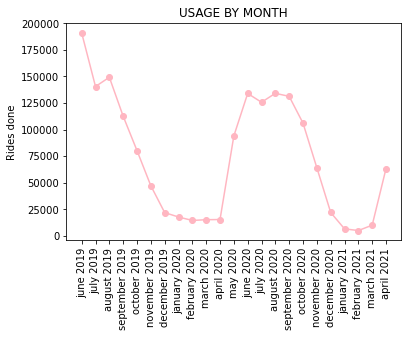

In [126]:
plt.plot(months, month_data, color = 'lightpink', marker = 'o')
plt.title('USAGE BY MONTH')
plt.ylabel('Rides done')
plt.xticks(rotation = 90)
plt.show()

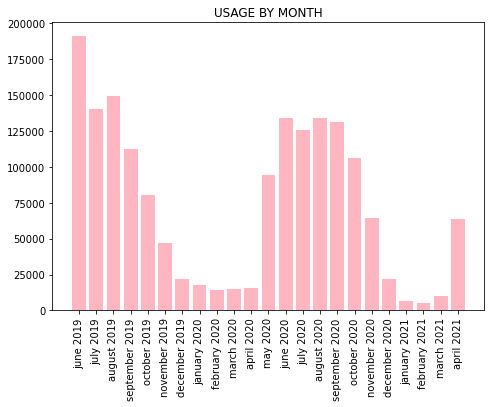

In [32]:
month_graph = plt.figure()
ax = month_graph.add_axes([0, 0, 1, 1])
ax.bar(months, month_data, color = 'lightpink')
ax.set_title('USAGE BY MONTH')
plt.xticks(rotation = 90)
plt.show()

### Finding average seasonally

In [99]:
summer = month_data[0] + month_data[1] + month_data[2] + month_data[12] + month_data[13] + month_data[14]
autumn = month_data[3] + month_data[4] + month_data[5] + month_data[15] + month_data[16] + month_data[17]
winter = month_data[6] + month_data[7] + month_data[8] + month_data[18] + month_data[19] + month_data[20]
spring = month_data[9] + month_data[10] + month_data[11] + month_data[21] + month_data[22]

In [100]:
seasons = ['summer', 'autumn', 'winter', 'spring']

In [101]:
season_data = [summer / 6, autumn / 6, winter / 6, spring / 5]

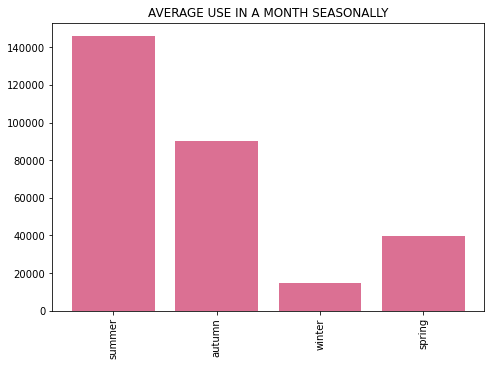

In [102]:
season_average_graph = plt.figure()
ax = season_average_graph.add_axes([0, 0, 1, 1])
ax.bar(seasons, season_data, color = 'palevioletred')
ax.set_title('AVERAGE USE IN A MONTH SEASONALLY')
plt.xticks(rotation = 90)
plt.show()

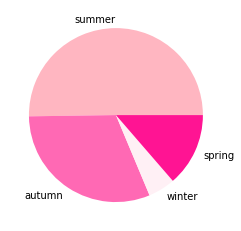

In [125]:
plt.pie(season_data, labels = seasons, colors = ['lightpink', 'hotpink', 'lavenderblush', 'deeppink'])
plt.show()

### Daily

In [33]:
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
day_data = []

for i in range(0, 7):
    day_data.append((pd.to_datetime(data.start_date).dt.weekday == i).sum())

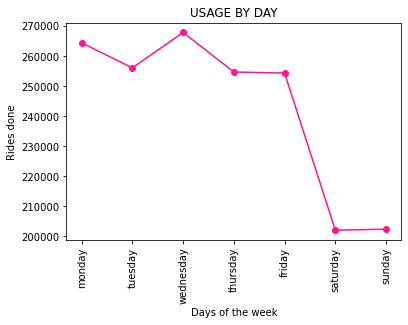

In [104]:
plt.plot(days, day_data, color = 'deeppink', marker = 'o')
plt.title('USAGE BY DAY')
plt.xlabel('Days of the week')
plt.ylabel('Rides done')
plt.xticks(rotation = 90)
plt.show()

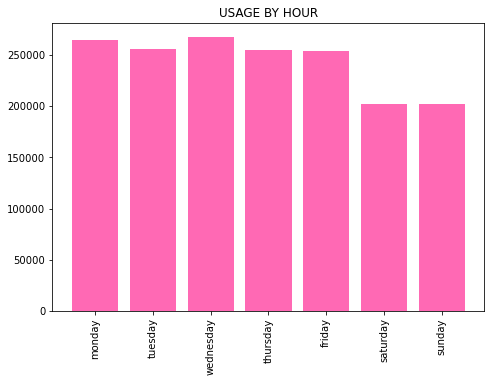

In [115]:
day_graph = plt.figure()
ax = day_graph.add_axes([0, 0, 1, 1])
ax.bar(days, day_data, color = 'hotpink')
ax.set_title('USAGE BY HOUR')
plt.xticks(rotation = 90)
plt.show()

### Hourly

In [108]:
start_datetime = data.start_date.str.cat(data.start_time, sep=" ")
# enamik kellaaegu on formaadis YYYY-mm-dd HH:MM:SS (pikkusega 19).
# kuid üksikud on formaadis +00:00 vms, nende jaoks eemaldame nood veidrad +00:00 asjad slicemisega
start_datetime = start_datetime.str.slice(0, 19)
# nüüd saab datetime-ks konverteerida
start_dt = pd.to_datetime(start_datetime)

In [109]:
hours = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12',
         '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-00']
hour_data = []

for i in range(0, 24):
    hour_data.append((pd.to_datetime(start_dt).dt.hour == i).sum())

<function matplotlib.pyplot.show(close=None, block=None)>

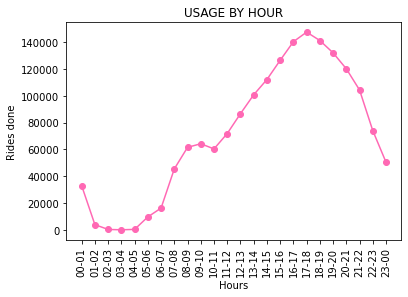

In [111]:
plt.plot(hours, hour_data, color = 'hotpink', marker = 'o')
plt.title('USAGE BY HOUR')
plt.xlabel('Hours')
plt.ylabel('Rides done')
plt.xticks(rotation = 90)
plt.show

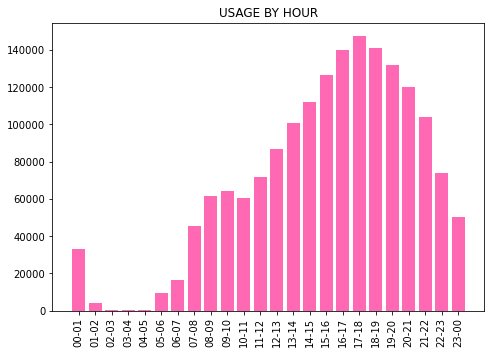

In [114]:
hour_graph = plt.figure()
ax = hour_graph.add_axes([0, 0, 1, 1])
ax.bar(hours, hour_data, color = 'hotpink')
ax.set_title('USAGE BY HOUR')
plt.xticks(rotation = 90)
plt.show()

### Graph of when women mostly use this service (hour)

### Graph of when men mostly use this service (hour)

# USER INFO

### Finding average age of all users

In [38]:
age_mean = data['age'].mean()

In [39]:
age_mean

29.388305735684533

### Finding most frequently occurring age of all users

In [40]:
age_mode = data['age'].mode()

In [41]:
age_mode

0    19.0
dtype: float64

### Finding median age of all users

In [42]:
age_median = data['age'].median()

In [43]:
age_median

25.0

### Finding how many males and females use this service

In [44]:
data['gender'].value_counts()

0    759065
1    546481
Name: gender, dtype: int64

### Finding how many users of a specific age

In [45]:
data['age'].min()

-60.0

In [46]:
data['age'].max()

221.0